# Binary Classification of the OI Dataset

The dataset consist of information on the patient's age, sex, OI type and the landmark coordinates.

In this notebook we will be experimenting with various algorithms. Before we start we will need to prepare our data.

In [2]:
import sklearn, csv
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load

In [3]:
# reading the csv file to a pandas dataframe
raw_df = pd.read_csv('oi_ml_db.csv')
oi_df = raw_df.drop(['Unnamed: 0', 'Genetic'], axis=1)
pd.DataFrame.head(oi_df)

,Group,File.No.,Age,Gender,1,2,3,4,5,6,...,127,128,129,130,131,132,133,134,135,136
0,1,247,9.75,F,-0.092029,-0.046122,-0.004750,0.036622,0.076192,0.111692,...,0.021580,0.038229,0.046834,0.017731,0.006984,-0.003919,-0.029018,-0.003609,0.007449,0.019253
1,1,248,46.00,M,-0.087255,-0.044113,-0.000605,0.042229,0.084390,0.121715,...,0.024153,0.043552,0.054324,0.022442,0.005124,-0.013601,-0.042180,-0.013968,0.004880,0.022075
2,1,117,9.50,M,-0.093099,-0.050187,-0.008432,0.032011,0.069601,0.101870,...,0.023409,0.043782,0.055508,0.019930,0.004186,-0.008934,-0.040112,-0.009088,0.004186,0.019930
3,1,118,4.50,F,-0.097396,-0.054587,-0.013650,0.026463,0.063994,0.095424,...,0.023868,0.040218,0.048534,0.019265,0.005838,-0.006880,-0.034215,-0.006766,0.007002,0.020429
4,1,10,16.50,M,-0.107241,-0.064653,-0.023025,0.018889,0.059456,0.093986,...,0.025020,0.041582,0.052597,0.021350,0.005461,-0.012100,-0.040288,-0.012100,0.005461,0.021350


In [4]:
# change the control group from 'c' to '0', '3' to '1' and '4' to '1'
oi_df = oi_df.replace({'Group':'c'}, 0)
oi_df = oi_df.replace({'Group':'3'}, 1)
oi_df = oi_df.replace({'Group':'4'}, 1)
# change M to 0 and F to 1
oi_df = oi_df.replace({'Gender':'M'}, 0)
oi_df = oi_df.replace({'Gender':'F'}, 1)
# we do not need the file.no anymore
oi_df = oi_df.drop(['File.No.'], axis=1)
# normalization of age
# oi_df = (oi_df-oi_df.mean())/oi_df.std()
pd.DataFrame.head(oi_df)

,Group,Age,Gender,1,2,3,4,5,6,7,...,127,128,129,130,131,132,133,134,135,136
0,1,9.75,1,-0.092029,-0.046122,-0.004750,0.036622,0.076192,0.111692,0.139643,...,0.021580,0.038229,0.046834,0.017731,0.006984,-0.003919,-0.029018,-0.003609,0.007449,0.019253
1,1,46.00,0,-0.087255,-0.044113,-0.000605,0.042229,0.084390,0.121715,0.153593,...,0.024153,0.043552,0.054324,0.022442,0.005124,-0.013601,-0.042180,-0.013968,0.004880,0.022075
2,1,9.50,0,-0.093099,-0.050187,-0.008432,0.032011,0.069601,0.101870,0.129200,...,0.023409,0.043782,0.055508,0.019930,0.004186,-0.008934,-0.040112,-0.009088,0.004186,0.019930
3,1,4.50,1,-0.097396,-0.054587,-0.013650,0.026463,0.063994,0.095424,0.121235,...,0.023868,0.040218,0.048534,0.019265,0.005838,-0.006880,-0.034215,-0.006766,0.007002,0.020429
4,1,16.50,0,-0.107241,-0.064653,-0.023025,0.018889,0.059456,0.093986,0.125210,...,0.025020,0.041582,0.052597,0.021350,0.005461,-0.012100,-0.040288,-0.012100,0.005461,0.021350


In [5]:
# shuffle the dataframe
rand_df = sklearn.utils.shuffle(oi_df)

# create the complete y and X sets from the shuffled data and scale the X values
X_full = rand_df.drop(['Group'], axis=1)
y_full = rand_df['Group']
X_full = preprocessing.scale(X_full)

# PCA for dimensional reduction of our data 138 features to 10 features
pca = PCA(n_components=20)
pComp = pca.fit_transform(X_full)

# splitting X and y for train and test 80/20
X_sets = np.split(pComp, [245, 61])
X_train = pComp[0:245,]
X_test = pComp[245:306,]
y_train = y_full.values[0:245,]
y_test = y_full.values[245:306,]

# cast y values as integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print('train set: ' + str(X_train.shape) + '\ntest set: ' + str(X_test.shape))

train set: (245, 20)
test set: (61, 20)


In [6]:
# Multi Layer Perceptron (AKA: shallow neural network)
# more sofisticated classifier but may tend to overfit
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=10, alpha=1e-4, solver='sgd', 
                    verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

# Binary classification seems to be working very well for this dataset 

Iteration 1, loss = 1.07683742
Iteration 2, loss = 0.43092388
Iteration 3, loss = 0.18613178
Iteration 4, loss = 0.08301742
Iteration 5, loss = 0.04115896
Iteration 6, loss = 0.02352774
Iteration 7, loss = 0.01402733
Iteration 8, loss = 0.00850355
Iteration 9, loss = 0.00551178
Iteration 10, loss = 0.00369092
Training set score: 1.000000
Test set score: 1.000000


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
# Linear Support Vector Machine
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
right = 0
wrong = 0
index = 0
for p in pred:
    if p == y_test[index]:
        right += 1
    if pred[index] != y_test[index]:
        wrong += 1
    index += 1
print('Test score: ' + str(right/61) + '%')

# the linear support vector machine seems to be performing similarily to the NN

Test score: 1.0%


In [8]:
# Logistic regression
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
lr_clf.score(X_test, y_test)

# logistic regression performed a solid 98.36% on the test set just like the svm
# 20 compoment PCA will give us 100% score on our training set

1.0

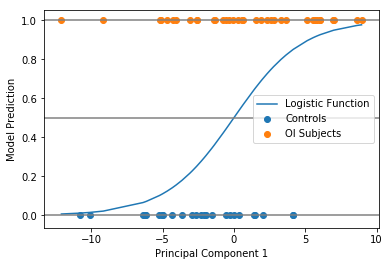

In [9]:
x0 = None
x1 = None

def split(y, array):
    g0 = []
    g1 = []
    for i in range(len(y)):
        if y[i] == 0:
            g0.append(array[i])
        if y[i] == 1:
            g1.append(array[i])
    return np.array(g0), np.array(g1)

# logistic function P(X) = e^{b0+b1X}/1+e^{b0+b1X}
def log_func(X):
    e = np.exp(lr_clf.coef_*X)
    y = e / (1+e)
    return y

f = 1

xy = np.concatenate((X_test[:,f], log_func(X_test)[:,f]))
xy = np.reshape(xy, (2,61))
xy = xy.T
xy = np.sort(xy, axis=0)
px = xy[:,0]
py = xy[:,1]

x0, x1 = split(y_test, X_test)
y0, y1 = split(y_test, X_test)
plt.scatter(x0[:,f], lr_clf.predict(x0), label = 'Controls')
plt.scatter(x1[:,f], lr_clf.predict(x1), label = 'OI Subjects')
#plt.scatter(X_test[:,f], log_func(X_test)[:,f], label = 'Logistic Function')
plt.plot(px, py, label = 'Logistic Function')
plt.ylabel('Model Prediction')
plt.xlabel('Principal Component 1')
plt.axhline(.5, color='.5')
plt.axhline(0, color='.5')
plt.axhline(1, color='.5')
plt.legend()
plt.savefig('log_func.jpg')
plt.show()


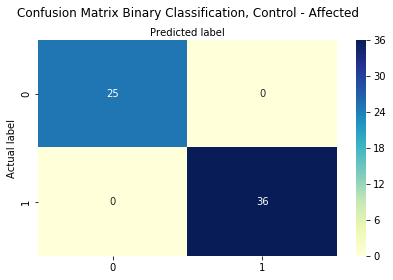

In [10]:
# confusion matrix
y_pred = lr_clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title("Confusion Matrix Binary Classification, Control - Affected", y=1.08)
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('conf_mat_bin.png')
plt.show()

In [11]:
# save the model with joblib
dump(lr_clf, 'bin_clf_ca.joblib') 

['bin_clf_ca.joblib']

In [14]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        36

avg / total       1.00      1.00      1.00        61



In [12]:
# model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


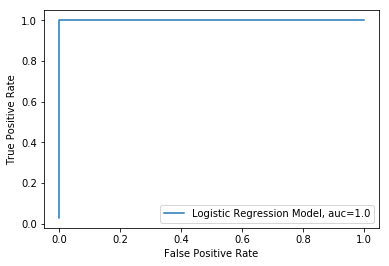

In [13]:
y_pred_proba = lr_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression Model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.savefig('log_roc.jpg')
plt.show()